# **APA - Linear Regression**
# DATA 3300





## Name(s): Oliver Heady

## Assignment

**When conducting a linear regression analysis, it’s critical to conduct exploratory analytics to identify if the assumptions of linear regression (relationship is linear, independent error values, error values are normally distributed, and residuals are homoscedastic) are met, or if data need to be modified to meet these assumptions. *For this exercise and the APA, assume this has already been done.***

# Q1

**Begin by importing the required packages (provided below), and then importing the cinema.xlsx dataset. View the heading of your dataframe.**

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metric

In [100]:
# read in cinema.xlsx file
df = pd.read_excel('/content/cinema.xlsx')
df.head()

,rating,rottentom,metacrit,wks,sportevent,budget,genre,attend
0,pg,0.61,58,14,n,195,action,322
1,pg,0.72,63,14,y,120,drama,265
2,r,0.51,47,10,y,128,drama,231
3,pg13,0.93,71,11,n,134,action,401
4,pg13,0.32,36,8,n,32,comedy,285


## A
**Assume all variables are normally distributed. Run a Pearson correlation analysis on your variables to examine relationships amongst the IVs and between the IVs and the DV. Remember to drop all variables from the correlation analysis that cannot be included.**

**Present your correlation matrix in a color-mapped table.**



In [101]:
# create new dataframe that drops variables that can't be included in correlation
df_cor = df[['metacrit', 'rottentom', 'budget', 'attend']]
# run correlation matrix
cor_matrix = df_cor.corr()
# display matrix in color-mapped table
cor_matrix.style.background_gradient(cmap = 'coolwarm', axis = None, vmin=-1, vmax=1)

,metacrit,rottentom,budget,attend
metacrit,1.000000,0.966718,0.128377,0.745692
rottentom,0.966718,1.000000,0.098045,0.775581
budget,0.128377,0.098045,1.000000,-0.008626
attend,0.745692,0.775581,-0.008626,1.000000


## B

**What percentage of the variance in `attend` is determined by the variance in `metacrit`? (Show your formula.) Interpret what the $r$ and $R^2$ values mean.**



In [102]:
# calculate R^2
0.745692 ** 2

0.5560565588640001

r = 0.745692 (the strength of the correlation between attend and metacrit is 75%)

r^2 = 0.556 (56% of the variance in attend is determined by the variance in metacrit.)

## C

**Using an $r$-value of 0.8 or greater to determine collinearity, identify one pair of IVs that appears collinear.**

**Identify the pair, provide the corresponding coefficient, and briefly discuss whether it makes sense for that pair to be collinear.** 


rottentom and metacrit have an r-value of 0.967, which is very colinear. This makes sense as they're both measuring viewer ratings of the movie, and they'd probably be pretty dang similar.

# Q2

**Run a linear regression analysis to create an estimation model to predict the weekly attendance of a movie. Remember to:**

* **Preprocess any variables as necessary (hint: categorical)**
* **Remove `metacrit` from your analysis (due to collinearity)**
* **Set the DV as y**
* **Create a training and test set for your IVs (x) and your DV (y) as was shown in the ICE and in the Cheat Sheet**




In [103]:
# select IVs to include in analysis, assign to object called 'x'
x = df.drop(['metacrit', 'attend'], axis = 1)
# dummy code categorical variables
x = pd.get_dummies(data = x, drop_first = True)
# view x 
x.head()

,rottentom,wks,budget,rating_pg13,rating_r,sportevent_y,genre_comedy,genre_drama
0,0.61,14,195,0,0,0,0,0
1,0.72,14,120,0,0,1,0,1
2,0.51,10,128,0,1,1,0,1
3,0.93,11,134,1,0,0,0,0
4,0.32,8,32,1,0,0,1,0


In [104]:
# set attendance as  DV, in an object called 'y'
y = df['attend']

In [105]:
# create 4 dataframe objects x_train, x_test, y_train, y_test. Set test_size to 0.2, set random_state to 101
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)
print(x_train.shape)
print(y_test.shape)
print(x_train.shape)
print(y_test.shape)

(106, 8)
(27,)
(106, 8)
(27,)


In [106]:
# add constant to x_train, assign to object called x_train_Sm
x_train_Sm = sm.add_constant(x_train)
# fit model to x_train_Sm and y_train, assign to object called ls
ls = sm.OLS(y_train, x_train_Sm).fit()
# to print summary of ls
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     38.67
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           6.45e-27
Time:                        16:05:58   Log-Likelihood:                -554.23
No. Observations:                 106   AIC:                             1126.
Df Residuals:                      97   BIC:                             1150.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          196.3279     29.829      6.582   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## A

**Using a value of α = 0.1, identify the IVs with an *insignificant* relationship with the DV. For each, provide the IV and the corresponding p-value. *Note that if any part of a multi-part variable is significant, then the entire variable (including those that appear insignificant) is considered to have a significant relationship.***

**How do you know each IV’s impact on the DV is insignificant?**




*   Budget (p = 0.686)
*   rating (p = .916 and .907)
* 




## B

**Remove the variable with the highest p-value (note that if a multi-part variable is to be removed, all parts should be removed simultaneously), re-run the analysis, and include summary table. Repeat this step until all IVs are significant at α = 0.1.** 


In [107]:
# drop variable(s) with highest p-value
x = x.drop(['budget', 'rating_pg13', 'rating_r'], axis = 1)
# retrain the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)
x_train_Sm = sm.add_constant(x_train)
ls = sm.OLS(y_train, x_train_Sm).fit()
# display summary statistics of model
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     63.38
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           1.84e-29
Time:                        16:05:58   Log-Likelihood:                -554.49
No. Observations:                 106   AIC:                             1121.
Df Residuals:                     100   BIC:                             1137.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          195.8707     27.137      7.218   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [108]:
# remaining drop IV with p-value above 0.01
# retrain the model
# display summary statistics of model

# Q3

**Intepret the final data table. Specifically:**

## A
**How would you interpret the coefficient of `genre_drama`, knowing that `genre_action` is the reference group?** 

**Is there a statistically significant difference in attendance between `genre_drama` and `genre_action`? How about between `genre_comedy` and `genre action`?**



For every one person that attends an action movie, 33 fewer people are goint to attend a drama movie. 

There is a statistically significant difference between genre_drama and genre_action (p = .001). There isn't a statistically significant difference between genre_comedy and genre_action (p = .504).

## B
**Develop a data visualization that includes the data points with the line of best fit (linear regression model) that illustrates the relationship between `attend` and `rottentom`.**



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Attendance')

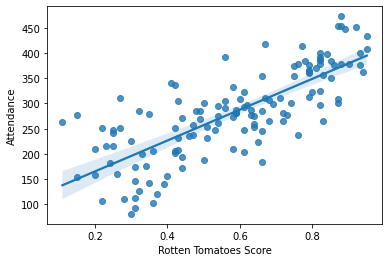

In [109]:
# import seaborn as sns
import seaborn as sns
# produce regression plot, pull x and y from df (e.g., df['attend'])
sns.regplot(df['rottentom'], df['attend'])
# label x-axis
plt.xlabel("Rotten Tomatoes Score")
# label y-axis
plt.ylabel("Attendance")

## C

**Evaluate the performance of your final model by fitting it to the test set, this will give us an idea of how well our model would generalize to new data.**

**Print out both the mean squared error and the R-Squared of the model, fit to the test set data.**

**How does the $R^2$ of test set compare to that of training set? Is it higher or lower, what could this indicate?**


In [110]:
# set LinearRegression function as object called 'model'
model = LinearRegression()
# fit the finalized training set to the model
model.fit(x_train_Sm, y_train)

LinearRegression()

In [112]:
# create object called x_test_Sm that adds a constant to x_test (intercept)
x_test_Sm = sm.add_constant(x_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [113]:
# make predictions using model trained on x_test_Sm
predictions = model.predict(x_test_Sm)

In [114]:
# produce the mean-squared error
print("Mean squared error =", round(metric.mean_squared_error(y_test, predictions), 2)) 
# produce the R^2
print("R2 score =", round(metric.r2_score(y_test, predictions), 2))

Mean squared error = 1372.6
R2 score = 0.65


## D

**Write out the regression model using the names of variables and all the coefficients determined by your model.**

attend = 329.6381(rottentom) - 5.05(wks) - 57.5567(sportevent_y) + 10.3744(genre_comedy) - 33.2498(genre_drama) + 195.8707

## E

**Using your formula in 3D, what would be the predicted attendance for:**

1. **A PG-13 rated, six-week-old action movie, with a $200 million budget shown during a week with a sporting event that received a Rotten Tomatoes score of 45%?**

2. **An R-rated, eight-week-old drama, with an $75 million budget, shown in a week with no sporting event that received a Rotten Tomatoes score of 65%.**



In [117]:
# calculate attendance
attendance1 = 329.6381*0.45 - 5.05*6 - 57.5567*1 + 10.3744*0 - 33.2498*0 + 195.8707

print(attendance1)

256.35114500000003


In [118]:
# calculate attendance
attendance2 = 329.6381*.65 - 5.05*8 - 57.5567*0 + 10.3744*0 - 33.2498*1 + 195.8707
print(attendance2)

336.48566500000004
